# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Analisando os erros de sintaxe

## Montando o DataFrame com os erros de sintaxe

In [2]:
nome_exercicio="gaussiana"

In [4]:
json_results= "exercicios/resultado_detalhado.json"
json_results

'exercicios/resultado_detalhado.json'

In [5]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'tipo_do_erro', 'resultado':'passou', 'detalhes':'erro'})


In [6]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,erro,tipo_do_erro,id,linha,passou,usuario
2421,,TabError: inconsistent use of tabs and spaces ...,ch4_2019_03_12_18_53_02_074097.py,8,False,user_399
2422,,ValueError: invalid literal for int) with base...,ch4_2019_03_12_18_49_28_222834.py,,False,user_399
2423,,,ch4_2019_03_12_19_04_33_021101.py,,True,user_399
2424,,IndentationError: unindent does not match any ...,ch4_2019_03_12_18_51_58_028962.py,8,False,user_399


In [7]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,erro,tipo_do_erro,id,linha,passou,usuario
2,,AssertionError: <|><O resultado obtido foi dif...,ch4_2019_04_04_18_35_57_401406.py,,False,user_001
6,,AssertionError: <|><O resultado obtido foi dif...,ch4_2019_03_15_12_00_02_827005.py,,False,user_004
9,def classifica idadei):,SyntaxError: invalid syntax,ch4_2020_04_13_14_04_21_323254.py,1,False,user_005
10,def classifica idade:,SyntaxError: invalid syntax,ch4_2020_04_13_14_03_57_762501.py,1,False,user_005
11,,TypeError: \'<=\' not supported between instan...,ch4_2020_04_13_14_16_54_398276.py,,False,user_005


In [8]:
df_sintaxe = df_erros[df_erros['tipo_do_erro'].str.contains("SyntaxError", na=False)]
df_sintaxe

,erro,tipo_do_erro,id,linha,passou,usuario
9,def classifica idadei):,SyntaxError: invalid syntax,ch4_2020_04_13_14_04_21_323254.py,1,False,user_005
10,def classifica idade:,SyntaxError: invalid syntax,ch4_2020_04_13_14_03_57_762501.py,1,False,user_005
12,def classifica idade:,SyntaxError: invalid syntax,ch4_2020_04_13_14_03_32_103198.py,1,False,user_005
13,if i <= 11:,SyntaxError: invalid syntax,ch4_2020_04_13_14_04_36_624418.py,3,False,user_005
22,if 11 < idade <=17):,SyntaxError: invalid syntax,ch4_2019_08_19_20_05_47_599836.py,3,False,user_009
24,if idade <= 11):,SyntaxError: invalid syntax,ch4_2019_08_19_20_08_42_828251.py,3,False,user_009
40,if idade > 17:\n,SyntaxError: invalid character in identifier,ch4_2020_09_07_02_01_19_781746.py,2,False,user_012
42,if idade =< 11:,SyntaxError: invalid syntax,ch4_2020_09_07_02_04_53_643707.py,4,False,user_012
47,if idade <= 11:,SyntaxError: invalid syntax,ch4_2020_03_18_21_12_01_189733.py,3,False,user_014
53,if x<=11,SyntaxError: invalid syntax,ch4_2020_09_09_19_21_19_960074.py,2,False,user_017


In [9]:
df_sintaxe["possivel_solucao"]="--"

In [20]:
df_sintaxe

,erro,tipo_do_erro,id,linha,passou,usuario,possivel_solucao
9,def classifica idadei):,SyntaxError: invalid syntax,ch4_2020_04_13_14_04_21_323254.py,1,False,user_005,--
10,def classifica idade:,SyntaxError: invalid syntax,ch4_2020_04_13_14_03_57_762501.py,1,False,user_005,--
12,def classifica idade:,SyntaxError: invalid syntax,ch4_2020_04_13_14_03_32_103198.py,1,False,user_005,--
13,if i <= 11:,SyntaxError: invalid syntax,ch4_2020_04_13_14_04_36_624418.py,3,False,user_005,--
22,if 11 < idade <=17):,SyntaxError: invalid syntax,ch4_2019_08_19_20_05_47_599836.py,3,False,user_009,--
24,if idade <= 11):,SyntaxError: invalid syntax,ch4_2019_08_19_20_08_42_828251.py,3,False,user_009,--
40,if idade > 17:\n,SyntaxError: invalid character in identifier,ch4_2020_09_07_02_01_19_781746.py,2,False,user_012,--
42,if idade =< 11:,SyntaxError: invalid syntax,ch4_2020_09_07_02_04_53_643707.py,4,False,user_012,--
47,if idade <= 11:,SyntaxError: invalid syntax,ch4_2020_03_18_21_12_01_189733.py,3,False,user_014,--
53,if x<=11,SyntaxError: invalid syntax,ch4_2020_09_09_19_21_19_960074.py,2,False,user_017,Faltou ':' na linha do 'if'


# Analisando e classificando os erros

In [21]:
erro_import=0
erro_antes_do_return=0
erro_fechar_parenteses=0
erro_abrir_parenteses=0
erro_potencia=0
erro_if=0
erro_elif=0
erro_else1=0
erro_else2=0
erro_while=0
erro_for=0
erro_def=0
erro_pi=0
erro_vezes=0
erro_print=0

In [22]:
def is_int(val):
    try:
        num = int(val)
    except ValueError:
        return False
    return True


In [23]:
lista_tipos_erros=[]
for ind in df_sintaxe.index: 
    sol='--'
    erro = df_sintaxe["erro"][ind]
    erro=str(erro)
    
#     if "return" in erro and len(erro)<30:
#         sol="Verifique a linha antes do return"
#         erro_antes_do_return+=1
    if "import" in erro or "Import" in erro:
        sol="Verifique a maneira com que está realizando o import"
        erro_import+=1
    if "(" in erro:
        abre_parenteses=erro.count('(')
        fecha_parenteses=erro.count(')')
        if abre_parenteses>fecha_parenteses:
            sol="Faltou fechar um parênteses"
            erro_fechar_parenteses+=1
        elif abre_parenteses<fecha_parenteses:
            sol="Faltou abrir um parênteses"
            erro_abrir_parenteses+=1
        
    if "^" in erro:
        sol="Potência em Python é: **"
        erro_potencia+=1
        
    if "if" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'if'"
        erro_if+=1
        
    if "elif" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'elif'"
        erro_elif+=1
    
    if "else" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'else'"
        erro_else1+=1
        
    if "else" in erro and len(erro)>5:
        sol="Retire a condição na linha do else"
        erro_else2+=1
        
    if "while" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'while'"
        erro_while+=1
        
    if "for" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'for'"
        erro_for+=1
        
    if "def" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'def'"
        erro_def+=1
        
    if "π" in erro:
        sol="π é math.pi"
        erro_pi+=1
        
    if ")(" in erro:
        sol="esqueceu o sinal de *"
        erro_vezes+=1
        
    anterior = "a"
    for atual in erro:
        if (is_int(anterior) and atual.isalpha()) or (is_int(anterior) and atual=="(") or (anterior==")" and (is_int(atual) or atual.isalpha())): 
            erro_vezes+=1
            sol="esqueceu o sinal de *"
        anterior=atual
    
    if "print" in erro and "(" not in erro:
        sol="print tem parênteses no python 3"
        erro_print+=1
        
    
        
    df_sintaxe["possivel_solucao"][ind]= sol
        
    
        
    
    
    

In [24]:
erros = {'tipos': ["erro_import", "erro_abrir_parenteses","erro_fechar_parenteses", "erro_potencia", "erro_if","erro_elif","erro_else:","erro_else_condicao", "erro_while", "erro_for", "erro_def", "erro_pi", "erro_vezes", "erro_print"],
        'quantidade': [erro_import,erro_abrir_parenteses, erro_fechar_parenteses, erro_potencia,erro_if, erro_elif, erro_else1, erro_else2, erro_while,erro_for, erro_def, erro_pi,erro_vezes, erro_print]
        }

df_classificacao = pd.DataFrame(erros, columns = ['tipos', 'quantidade'])


In [25]:
df_classificacao.set_index("tipos")

,quantidade
tipos,
erro_import,0
erro_abrir_parenteses,0
erro_fechar_parenteses,5
erro_potencia,0
erro_if,177
erro_elif,13
erro_else:,5
erro_else_condicao,112
erro_while,0


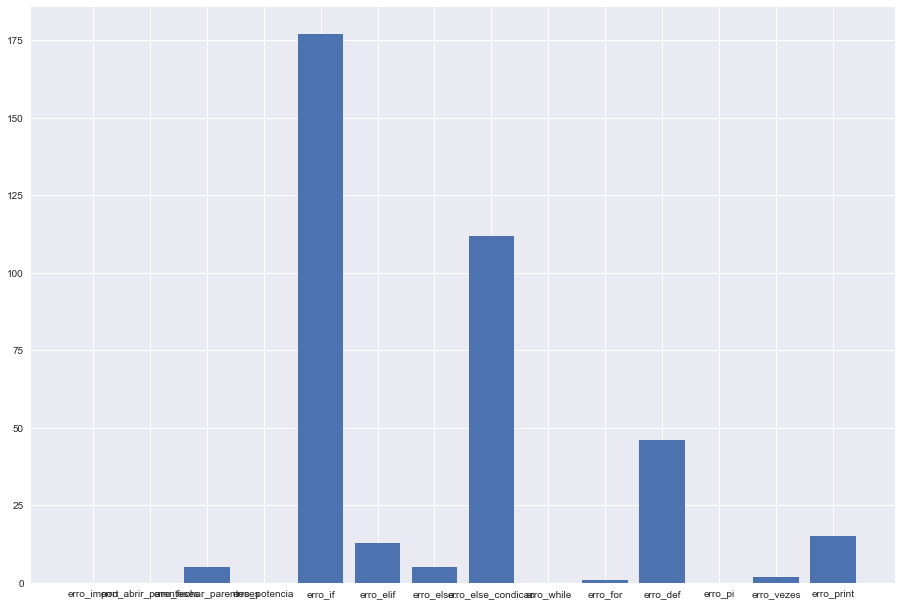

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_classificacao["tipos"], df_classificacao["quantidade"])
plt.show()

In [27]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_sintaxe["possivel_solucao"]
users = df_sintaxe["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

usuario,user_005,user_009,user_012,user_014,user_017,user_018,user_020,user_022,user_023,user_025,...,user_370,user_372,user_373,user_376,user_378,user_380,user_381,user_382,user_393,user_396
possivel_solucao,,,,,,,,,,,,,,,,,,,,,
--,4,2,2,1,2,2,1,1,0,4,...,1,4,9,0,1,0,1,6,1,0
Faltou ':' na linha do 'def',0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'elif',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'for',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'if',0,0,0,0,2,0,0,0,1,0,...,4,0,3,5,0,0,0,0,5,1
Faltou fechar um parênteses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Retire a condição na linha do else,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
esqueceu o sinal de *,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
print tem parênteses no python 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Digite o ID de um usuário para descobrir seus principais erros

### Selecione o usuário:

In [31]:
usuario = "user_005"

In [32]:
table[usuario]

possivel_solucao
--                                    4
Faltou ':' na linha do 'def'          0
Faltou ':' na linha do 'elif'         0
Faltou ':' na linha do 'for'          0
Faltou ':' na linha do 'if'           0
Faltou fechar um parênteses           0
Retire a condição na linha do else    0
esqueceu o sinal de *                 0
print tem parênteses no python 3      0
Name: user_005, dtype: int64

In [33]:
errors = df_sintaxe.loc[df_sintaxe["usuario"]==usuario]
errors.loc[:, ["erro", "linha","linha","possivel_solucao"]]

,erro,linha,linha,possivel_solucao
9,def classifica idadei):,1,1,--
10,def classifica idade:,1,1,--
12,def classifica idade:,1,1,--
13,if i <= 11:,3,3,--
